In [69]:
! pip install plotly

Defaulting to user installation because normal site-packages is not writeable


In [70]:
import numpy as np
import pandas as pd

import plotly.express as py
from sklearn.preprocessing import StandardScaler

%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch
import numpy as np

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [71]:
np.random.seed(42)

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],
                     [0,1,0],
                     [0,0,1]])
class_sample1 = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)
df = pd.DataFrame(class_sample1, columns=['col1','col2','col3'])
df['target'] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],
                     [0,1,0],
                     [0,0,1]])
class_sample2 = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)
df1 = pd.DataFrame(class_sample2, columns=['col1','col2','col3'])
df1['target'] = 0

df = pd.concat([df, df1], ignore_index=True)
df.sample(10)

,col1,col2,col3,target
32,1.296120,1.261055,1.005113,0
36,1.257550,0.925554,-0.918771,0
35,1.404051,2.886186,1.174578,0
22,0.927990,2.003533,1.361636,0
11,-1.057711,0.822545,-1.220844,1
25,1.821903,1.087047,0.700993,0
13,0.196861,0.738467,0.171368,1
12,0.208864,-1.959670,-1.328186,1
9,0.375698,-0.600639,-0.291694,1
39,-0.168678,2.142823,1.751933,0


In [72]:
x = df1.drop(columns='target',axis=1)

In [73]:
x_scaled = StandardScaler().fit_transform(x)

In [74]:
cov_mat = np.cov([df.iloc[:,0], df.iloc[:,1], df.iloc[:,2]])
cov_mat

array([[0.56835055, 0.32153243, 0.07163771],
       [0.32153243, 1.54652103, 0.41908002],
       [0.07163771, 0.41908002, 1.48866433]])

In [75]:
eigen_values, eigen_vectors = np.linalg.eig(cov_mat)

In [76]:
eigen_values

array([1.99542034, 0.46906733, 1.13904823])

In [77]:
eigen_vectors

array([[-0.19917457, -0.95000993, -0.2404384 ],
       [-0.74116832,  0.30654625, -0.59724276],
       [-0.64109204, -0.05924975,  0.76517348]])

In [78]:
pc = eigen_vectors[0:2]
pc

array([[-0.19917457, -0.95000993, -0.2404384 ],
       [-0.74116832,  0.30654625, -0.59724276]])

In [79]:
new_df = np.dot(df.iloc[:,0:3],pc.T)
new_df = pd.DataFrame(new_df, columns=['PC1','PC2'])
new_df['target'] = df1['target']

new_df

,PC1,PC2,target
0,-0.123310,-0.797360,0.0
1,-0.024605,-1.060764,0.0
2,-0.930730,-0.654818,0.0
3,0.444167,-0.266034,0.0
4,2.184179,0.264351,0.0
5,0.998636,-0.081412,0.0
6,1.170160,-0.635286,0.0
7,0.323381,1.038959,0.0
8,0.279793,1.124905,0.0
9,0.565918,-0.288367,0.0


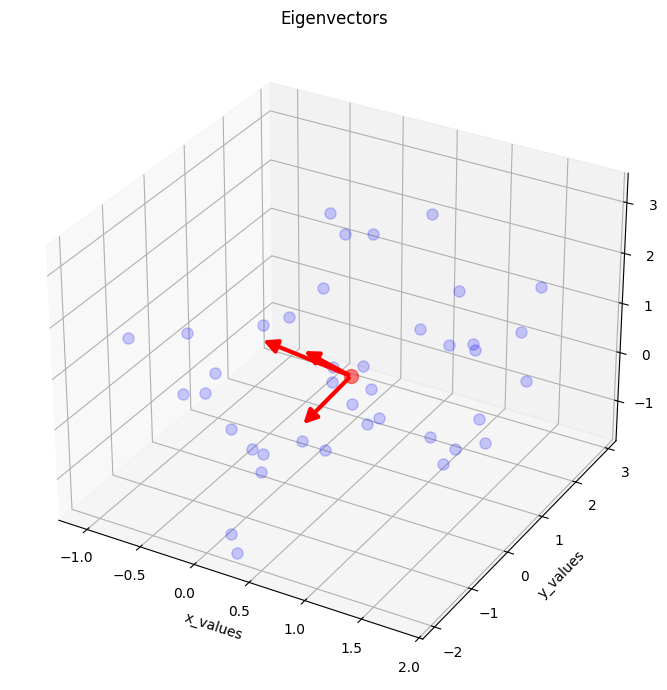

In [80]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return np.min(zs)

    def draw(self, renderer):
        super().draw(renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(df['col1'], df['col2'], df['col3'], 'o', markersize=8, color='blue', alpha=0.2) # Data Points

mean_x, mean_y, mean_z = df['col1'].mean(), df['col2'].mean(), df['col3'].mean() # Mean Point
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)

for v in eigen_vectors.T:
    
    a = Arrow3D([mean_x, mean_x + v[0]], 
                [mean_y, mean_y + v[1]], 
                [mean_z, mean_z + v[2]], 
                mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)

ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')
plt.title('Eigenvectors')
plt.tight_layout()
plt.show()